# **Logistic Regression**

## 1.1 Fundamentos de la técnica

La Regresión Logística es una técnica de clasificación supervisada utilizada para predecir una variable categórica, generalmente binaria (por ejemplo, sí/no, positivo/negativo, 1/0). A diferencia de la regresión lineal, cuyo objetivo es estimar valores continuos, la regresión logística busca estimar la probabilidad de que una observación pertenezca a una determinada clase.

El objetivo principal del modelo es aprender, a partir de los datos, una función matemática que asigne a cada vector de entrada
x una probabilidad entre 0 y 1, indicando qué tan probable es que dicho patrón pertenezca a la clase positiva (clase 1).

## ¿Por qué no funciona la regresión lineal para casos de clasificación?

Si se aplicara directamente una regresión lineal para predecir clases:

Los valores predichos podrían estar fuera del rango
[0,1].

La relación entre variables puede no ser lineal.

No existe una forma natural de interpretar la salida como probabilidad.

Por ello se introduce la función sigmoide, la cual transforma cualquier número real en un valor entre 0 y 1.

## 1.2 Modelo Matemático
Para construir un modelo de regresión logística, se parte de la ecuación de regresión lineal.

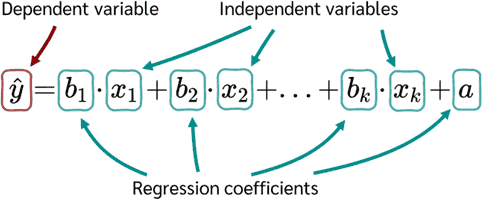

No obstante, si simplemente se calculara una regresión lineal para resolver una regresión logística, gráficamente se obtendría el siguiente resultado:

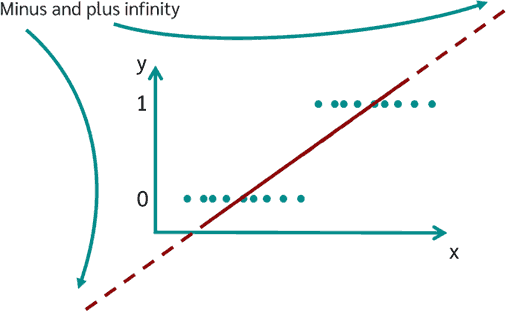

Como puede verse en el gráfico, ahora pueden darse valores entre más y menos infinito. El objetivo de la regresión logística es, sin embargo, estimar la probabilidad de ocurrencia y no el valor de la variable en sí. Por tanto, esta ecuación debe ser transformada.

Para ello, es necesario restringir el intervalo de valores de la predicción al intervalo entre 0 y 1. Para garantizar que sólo son posibles valores entre 0 y 1, se utiliza la función< logística f.

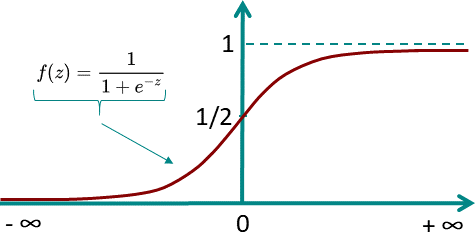

Así es que la función logística es perfecta para describir la probabilidad P(y=1). Si ahora se aplica la función logística a la ecuación de regresión mostrada anteriormente, el resultado es:

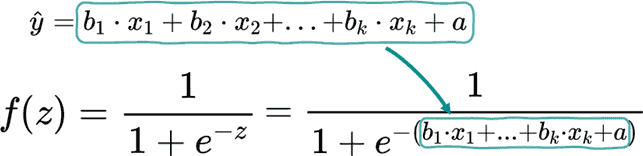

Esto garantiza que, independientemente del intervalo en que se encuentren los valores de x, sólo resultarán valores entre 0 y 1. El nuevo gráfico tiene ahora este aspecto:

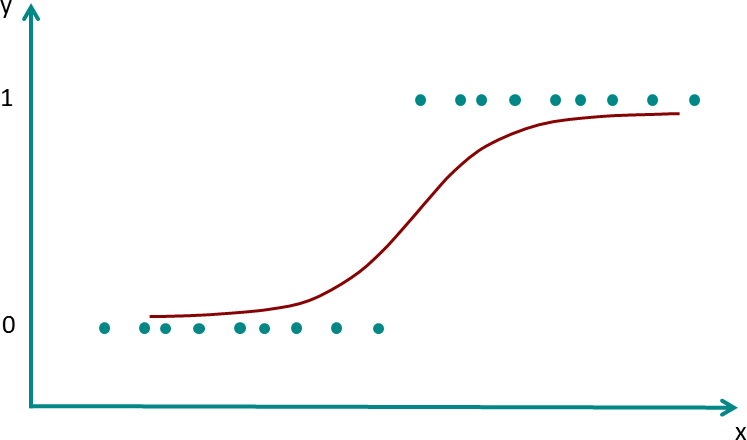

La probabilidad de que para unos valores dados de la variable independiente la variable dependiente dicotómica y sea 0 ó 1 viene dada por:


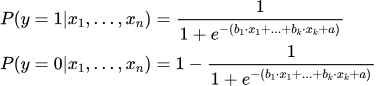

Para calcular la probabilidad de que una persona esté enferma o no mediante la regresión logística del ejemplo anterior, primero hay que determinar los parámetros del modelo b1, b2, b3 y a. Una vez determinados, la ecuación del ejemplo anterior es:


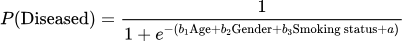


Como la salida del modelo es una probabilidad, se convierte en una clase mediante un umbral
τ, típicamente 0.5:

si P(y=1∣x)≥0.5 -> ŷ = 1

si P(y=1∣x)<0.5 -> ŷ = 0

Este umbral puede ajustarse según el problema (por ejemplo, para priorizar sensibilidad o especificidad en medicina).


## 1.3 Descripción de la librería, clases, funciones (python) empleadas

Se utilizan las librerías NumPy, Pandas y Matplotlib. NumPy es una librería de computación numérica que permite manejar arreglos multidimensionales; en este código solo funciona como dependencia indirecta. Pandas se usa para manipulación de datos, específicamente para crear un DataFrame con las características del dataset Iris y obtener estadísticas descriptivas mediante df.describe(). Matplotlib permite generar visualizaciones y aquí se utiliza para crear un gráfico de dispersión que muestra dos de las características de las flores.

Del módulo scikit-learn se utilizan varias herramientas fundamentales. La función train_test_split divide los datos en entrenamiento y prueba, permitiendo controlar el tamaño del conjunto de prueba (test_size) y asegurando reproducibilidad con random_state. La clase StandardScaler se usa para escalar las características de entrada, transformándolas para que tengan media 0 y desviación estándar 1; sus métodos principales son fit_transform() y transform(). El modelo utilizado es LogisticRegression, un clasificador supervisado adecuado para problemas binarios; sus métodos principales son fit() para entrenar el modelo y predict() para generar predicciones.

También se emplean métricas de evaluación del módulo sklearn.metrics. La función confusion_matrix construye la matriz de confusión que permite analizar aciertos y errores del modelo, mientras que ConfusionMatrixDisplay facilita su visualización gráfica. La función accuracy_score calcula el porcentaje total de predicciones correctas. Además, el dataset se obtiene mediante load_iris, una función que carga directamente el conjunto de datos Iris, que contiene cuatro características por muestra y tres clases, aunque en este código solo se utilizan dos para simplificar el modelo a una clasificación binaria.

Finalmente, el código define la función predict_pattern(pattern), que permite realizar predicciones manuales. Esta función escala primero el patrón de entrada usando el mismo StandardScaler entrenado y luego utiliza el modelo de Regresión Logística para predecir la clase correspondiente, imprimiendo el resultado. Esta función es útil para probar el modelo con cualquier vector nuevo de características.

## 1.4 Pipeline


#### Preprocesamiento

En esta sección se cargan los datos del dataset Iris y se seleccionan únicamente las muestras pertenecientes a dos clases para convertir el problema en una clasificación binaria. Luego, se construye un DataFrame con Pandas para organizar las características y la clase objetivo, permitiendo obtener estadísticas descriptivas mediante df.describe(), lo cual facilita un análisis numérico inicial del conjunto de datos. Finalmente, se genera un gráfico de dispersión usando Matplotlib para visualizar dos de las características y observar cómo se distribuyen las muestras según su clase, lo que proporciona una primera inspección visual útil antes del entrenamiento del modelo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X = data.data[data.target != 2]
y = data.target[data.target != 2]

df = pd.DataFrame(X, columns=data.feature_names)
df["class"] = y

df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


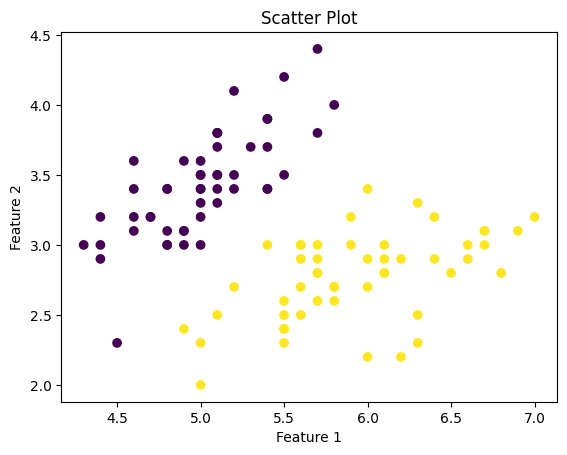

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot")
plt.show()


#### Prediction

En esta parte del código se divide el conjunto de datos en entrenamiento y prueba mediante train_test_split, reservando el 20% para evaluar el modelo. Luego, se aplica normalización a las características utilizando StandardScaler: primero se ajusta y transforma el conjunto de entrenamiento, y después se aplica la misma transformación al conjunto de prueba para mantener coherencia en la escala. A continuación, se crea una instancia del modelo de Regresión Logística y se entrena con los datos escalados. Además, se define la función predict_pattern(), que permite predecir la clase de cualquier nuevo patrón; esta función escala primero la entrada usando el mismo scaler entrenado y luego utiliza el modelo para obtener la predicción. Finalmente, se prueba esta función usando uno de los ejemplos del conjunto de prueba para verificar su funcionamiento.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_s, y_train)


LogisticRegression()

In [4]:

def predict_pattern(pattern):
    pattern_scaled = scaler.transform([pattern])
    prediction = model.predict(pattern_scaled)[0]
    print(f"Clase predicha: {prediction}")

predict_pattern(X_test[0])


Clase predicha: 1


#### Model Evaluation

En esta sección se generan predicciones del modelo usando el conjunto de prueba escalado y posteriormente se calcula la matriz de confusión mediante confusion_matrix, la cual permite comparar las etiquetas reales contra las predichas. Con ConfusionMatrixDisplay se visualiza esta matriz en forma de gráfico, facilitando la interpretación de los aciertos y errores del clasificador.

En los resultados obtenidos, el modelo predice correctamente las 12 muestras de la clase 0 y las 8 muestras de la clase 1, sin cometer errores en ninguna categoría. Esto se refleja en los valores de la diagonal principal (12 y 8), mientras que las posiciones correspondientes a errores muestran ceros. Esta matriz indica que el modelo logró una clasificación perfecta en este subconjunto de prueba, lo cual sugiere que la separación entre las dos clases seleccionadas del dataset Iris es muy clara y la Regresión Logística es adecuada para este problema binario.

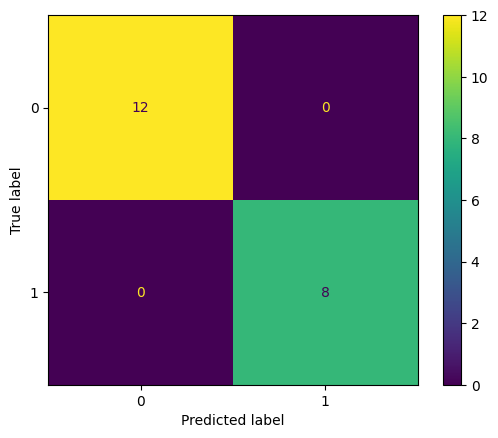

In [5]:
y_pred = model.predict(X_test_s)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# Referencias
* numiqo. (2025). Regresión logística. https://numiqo.es/tutorial/logistic-regression
* Wikipedia contributors. (2025, 19 noviembre). Logistic regression. Wikipedia. https://en.wikipedia.org/wiki/Logistic_regression

